In [1]:
#import all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#read the dataset from remote machine 

In [4]:
A = pd.read_csv("C:/Users/vipul ghare/Desktop/ETL Hive/csvfiles/sidhardhan/Regression/insurance.csv")

In [6]:
#preview the dataset

In [7]:
A.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Get information about the dataset

In [9]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#describe function will tell you more about the dataset

In [11]:
A.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
#check for any null value

In [13]:
A.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#Exploratory Data Analysis(EDA)

C:\Users\vipul ghare\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipul ghare\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipul ghare\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

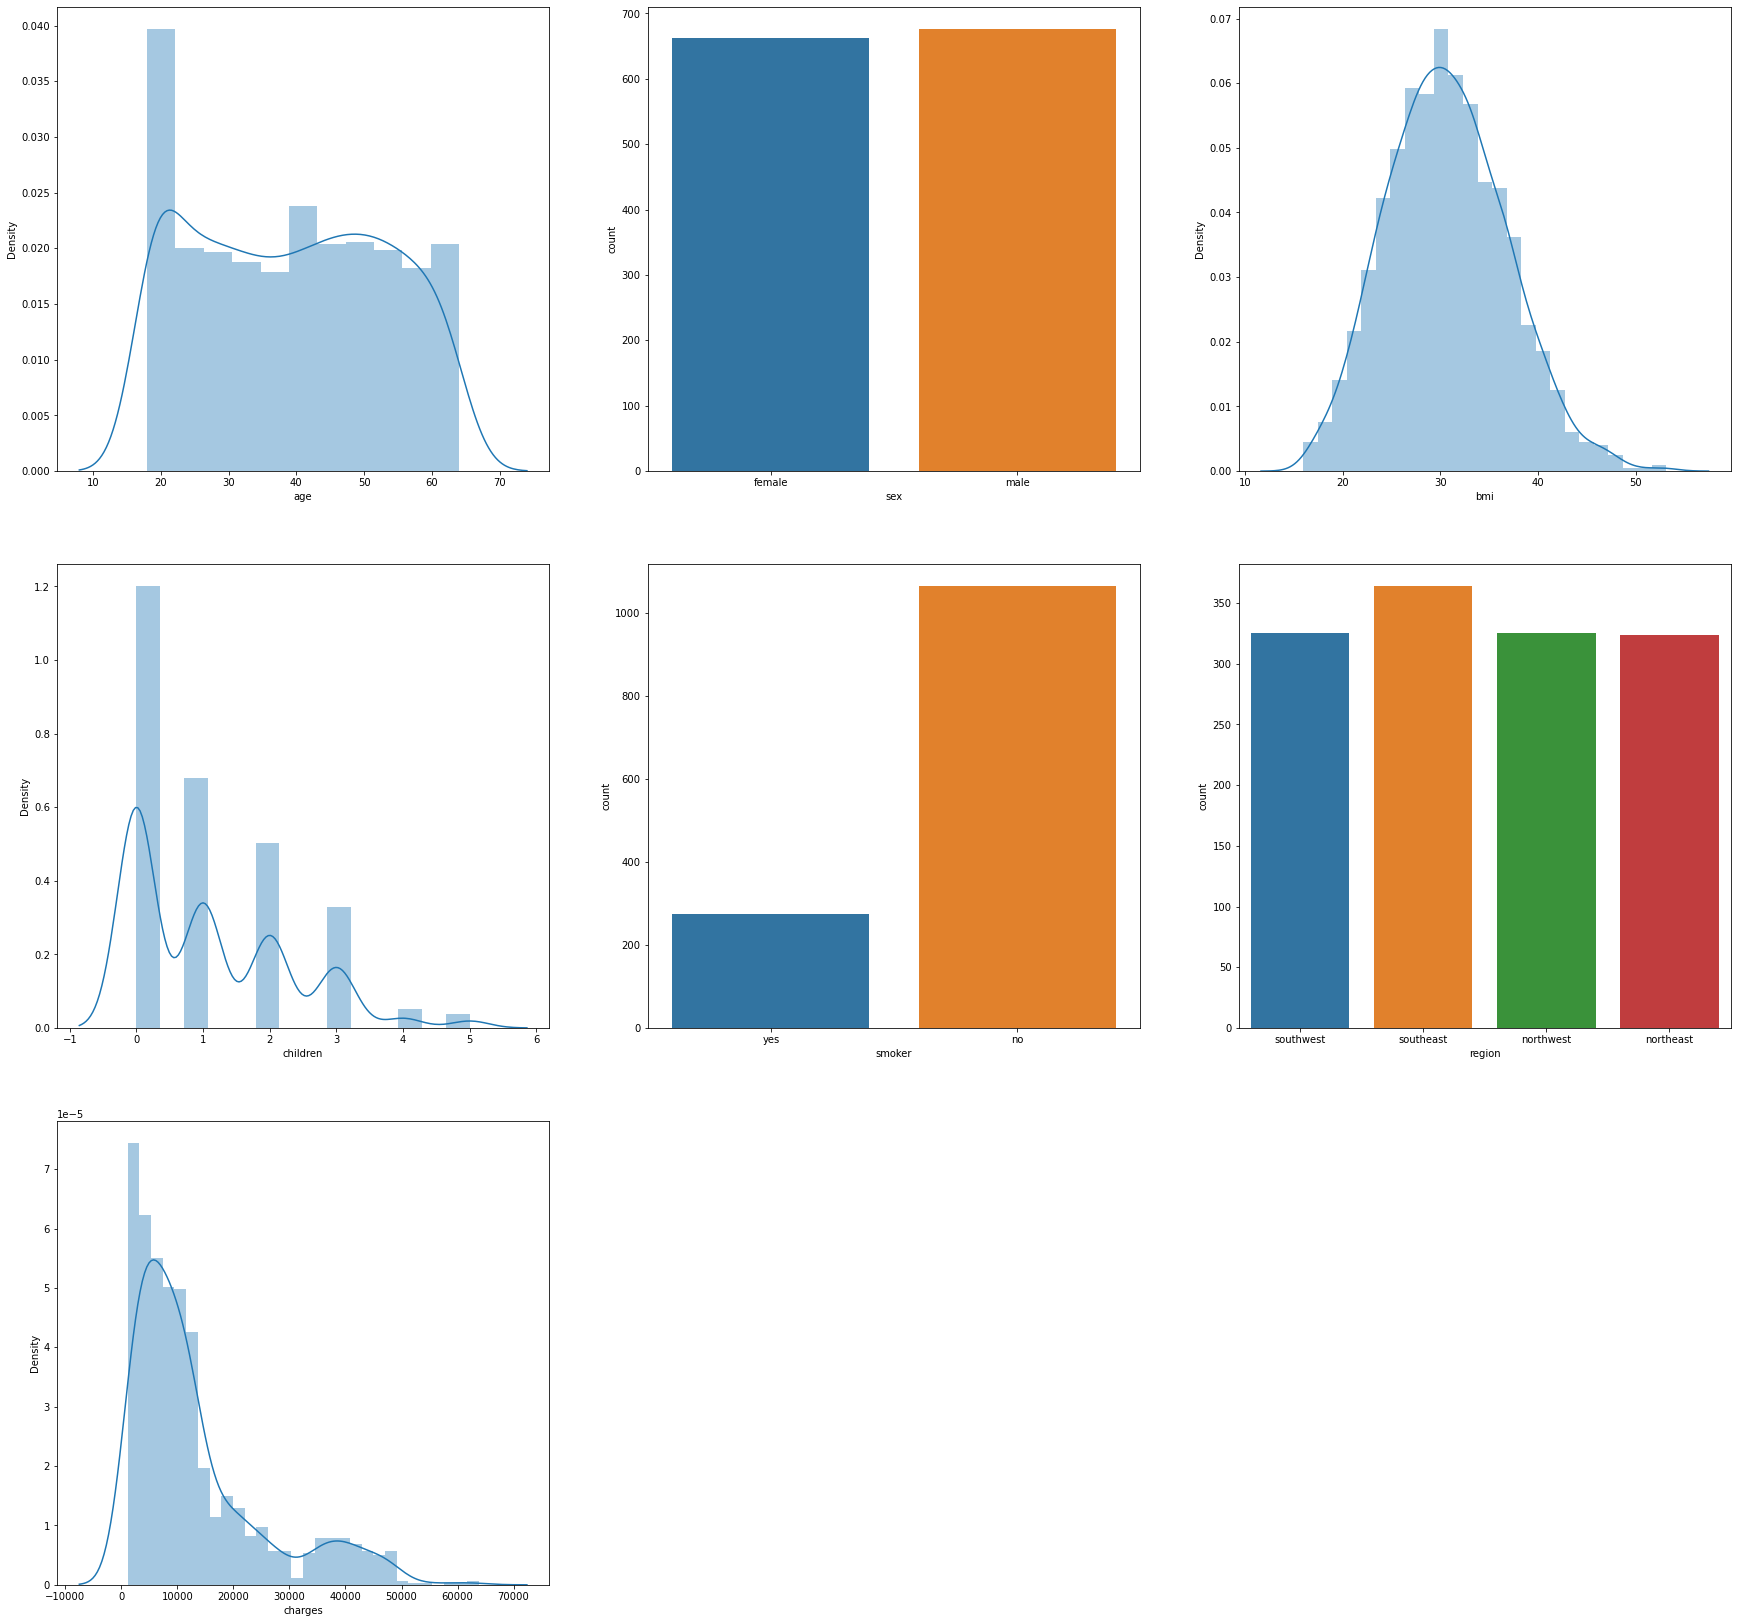

In [16]:
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [17]:
#Declare Predictor and Target varibale

In [18]:
Y=A[["charges"]]

In [20]:
X = A.drop(labels=["charges"],axis=1)
cat =[]
con =[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
            
from sklearn.preprocessing import StandardScaler #standarize the data
ss = StandardScaler()
Qcon = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    
Qcat = pd.get_dummies(X[cat])
    
X = Qcon.join(Qcat)

In [21]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [22]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0


In [23]:
#split the data in training and testing data

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)

In [25]:
# Fitting Multiple Decision Tree Regressor to the Training set

In [31]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(criterion='mae',random_state=21,max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    pred1 = model.predict(xtrain)
    from sklearn.metrics import mean_absolute_error
    print(i,mean_absolute_error(ytest,pred),mean_absolute_error(ytrain,pred1))

2 2906.4770339141787 3225.678894672897
3 2199.7684729999996 2440.5880862710283
4 1743.0487477201493 2090.2581835700935
5 1647.5769053694028 1895.1426027570092
6 1604.6587601082092 1686.223359514019
7 1692.9508584104478 1502.949002542056
8 1658.4308335783583 1256.3250503177571
9 1989.4645558358209 892.9681819345795
10 2033.4753607611942 632.297878457944
11 2261.441656059701 412.78671652336453
12 2348.5517226082093 239.89521173831778
13 2463.3710410970148 116.32854927102804
14 2599.2662635410443 56.247494738317755
15 2615.611957037313 45.87559476635514
16 2704.528910171642 30.942637149532707
17 2601.614222410448 29.76349929906542
18 2709.3550602462687 29.572515327102803
19 2709.3550602462687 29.572515327102803


In [32]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(criterion='mae',random_state=21,min_samples_split=i,max_depth=6)
    model = dtr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    print(i,mean_absolute_error(ytest,pred))

2 1604.6587601082092
3 1604.6587601082092
4 1604.6587601082092
5 1662.4099269179105
6 1602.7913786716417
7 1607.2051322164177
8 1604.5655554440298
9 1572.2415416194028
10 1572.2415416194028
11 1579.36495561194
12 1579.36495561194
13 1584.1602494552237
14 1586.627820164179
15 1582.9704013208952
16 1582.9704013208952
17 1584.1334832238806
18 1584.1334832238806
19 1584.1334832238806


In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mae',random_state=21,min_samples_split=9,max_depth=6)
model = dtr.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)

In [37]:
#Calculation of Error of the model

In [38]:
from sklearn.metrics import mean_absolute_error
print("Training error :",mean_absolute_error(ytrain,pred_tr))
print("Testing error :",mean_absolute_error(ytest,pred_ts))

Training error : 1732.626728682243
Testing error : 1572.2415416194028
